#### SHARVESHWARAN S
#### DS205229128

### Lab11. Retrieving Data From Web and Parsing
#### Question1. Retrieve data from web page using URLLIB and print the frequency of words from that page.

In [8]:
import urllib.request
counts = dict()
fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')
for line in fhand:
    words = line.decode().split()
    for word in words:
        counts[word] = counts.get(word, 0) + 1
print(counts)


{'But': 1, 'soft': 1, 'what': 1, 'light': 1, 'through': 1, 'yonder': 1, 'window': 1, 'breaks': 1, 'It': 1, 'is': 3, 'the': 3, 'east': 1, 'and': 3, 'Juliet': 1, 'sun': 2, 'Arise': 1, 'fair': 1, 'kill': 1, 'envious': 1, 'moon': 1, 'Who': 1, 'already': 1, 'sick': 1, 'pale': 1, 'with': 1, 'grief': 1}


#### Question2. Retrieve and display all hyperlinks (ie., HREF attribute) from a webpage using BeautifulSoup

In [15]:
import urllib.request,urllib.parse,urllib.error
from bs4 import BeautifulSoup
import ssl
ctx=ssl.create_default_context()
ctx.check_hostname=False
ctx.verify_mode = ssl.CERT_NONE
url=input('enter url')
html=urllib.request.urlopen(url,context=ctx).read()
soup=BeautifulSoup(html,'html.parser')
tags=soup('a')
for tag in tags:
    print(tag.get('href',None))

enter urlhttps://www.crummy.com/software/BeautifulSoup/bs4/doc/
genindex.html
#

#beautiful-soup-documentation
http://www.crummy.com/software/BeautifulSoup/
http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
#porting-code-to-bs4
https://www.crummy.com/software/BeautifulSoup/bs4/doc.zh/
http://kondou.com/BS4/
https://www.crummy.com/software/BeautifulSoup/bs4/doc.ko/
https://www.crummy.com/software/BeautifulSoup/bs4/doc.ptbr
https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/
#getting-help
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
#diagnose
#quick-start
#installing-beautiful-soup
http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
http://www.crummy.com/software/BeautifulSoup/download/4.x/
#problems-after-installation
#installing-a-parser
http://lxml.de/
http://code.google.com/p/html5lib/
#differences-between-parsers
#making-the-soup
#id17
#kinds-of-objects
#tag
#navigating-the-tree
#searching-the-tree
#name
#attributes
#multi-

#### Question3. Create a HTML file for the following Student Marks and print the number of students and their names and marks. 

In [2]:
from IPython.core.display import HTML

que3 = '''
<table>
    <tr>
        <td>ID</td>
        <td>NAME</td>
        <td>MARK1</td>
        <td>MARK2</td>
        <td>MARK3</td>
    </tr>
    <tr>
        <td>DS01</td>
        <td>REX</td>
        <td>87</td>
        <td>57</td>
        <td>74</td>
    </tr>
    <tr>
        <td>DS02</td>
        <td>PETER</td>
        <td>68</td>
        <td>98</td>
        <td>55</td>
    </tr>
</table>

'''
      
HTML(que3)

ID,NAME,MARK1,MARK2,MARK3
DS01,REX,87,57,74
DS02,PETER,68,98,55


#### Question4. Create a JSON file for the following Students Marks and print the number of students and their names and marks.
#### ID: DS01: Name: rex 
               Semester1: 80, 55
               Semester2: 50, 70, 82
#### ID: DS02: Name: peter
               Semester1: 92, 75

In [23]:
import json
data = '''
[
{"id" : "ds01",
 "name" : "rex",
 "semester1":"80,55",
 "semester2":"78,98"
},
{"id" : "ds02",
"name" :"Brent",
"semester1":"35,67",
"semester2":"65,87"
}
]'''
info = json.loads(data)
print('User count:', len(info))
for item in info:
        print('Name', item['name'])
        print('Id',item['id'])
        print('semester1', item['semester1'])
        print('semester2',item['semester2'])

User count: 2
Name rex
Id ds01
semester1 80,55
semester2 78,98
Name Brent
Id ds02
semester1 35,67
semester2 65,87


#### Question5. Crawl Weather of a City and Display 7 Day Forecast
- Find weather data of Tiruchirappalli city from some website such as www.weather.com
- Exploring page structure with Chrome DevTools
- Extract information from web page and display the weather forecast for 10 days or 7 days
- Reference: https://www.dataquest.io/blog/web-scraping-tutorial-python/

In [1]:
import requests
from bs4 import BeautifulSoup

page=requests.get("https://weather.com/en-IN/weather/tenday/l/d251a574fa1fa7a38aef6a630cb7e91a5c92cc2165acc34a8ba2f7e589c0f61e")
page.content

bs4=BeautifulSoup(page.content,'html.parser')
bs4.find_all('p')
(bs4.find_all(class_='DetailsSummary--DetailsSummary--QpFD-'))
days=[bs4.find_all('h2')[day].get_text() for day in range(len(bs4.find_all('h2')))]
tempr=[bs4.find_all(class_="DetailsSummary--temperature--3FMlw")[temp].get_text() for temp in range(len(bs4.find_all(class_="DetailsSummary--temperature--3FMlw")))]


days=days[1:12]
tempr=tempr[1:12]

from IPython.display import display
import pandas as pd
#creating a data frame to store the values
b={"Days": days,
   "Temperature": tempr}
weather = pd.DataFrame(b)

weather

,Days,Temperature
0,Tonight,34°/22°
1,Sun 14,35°/22°
2,Mon 15,35°/21°
3,Tue 16,35°/22°
4,Wed 17,34°/22°
5,Thu 18,33°/22°
6,Fri 19,33°/22°
7,Sat 20,32°/22°
8,Sun 21,34°/21°
9,Mon 22,35°/21°


#### Question6. Real Time Stock Prices Crawling and Display of a specified Company
- Crawl prices of a stock such as InfoSys (Stock Code INFY) for a period of month or year.
- Plot a line graph of monthly or yearly price movements
- Crawl prices of one more stock such as CTS
- Update your line graph with the prices movements of two stocks
#### Reference:
- https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/
- https://github.com/rajkumarbhc/datascienceutils/blob/master/data_science_utils/financial/Web%20Scraping%20and%20Financial%20Data%20Exploration%20in%20Python-Tutorial.ipynb


In [8]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()
df_info = pdr.get_data_yahoo("INFY", start="2018-01-01").reset_index()
df_info.to_csv('INFY.csv',index=False)
df_info.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,8.135,8.195,8.115,8.145,7.429263,12298200
1,2018-01-03,8.120,8.135,8.050,8.075,7.365414,10250800
2,2018-01-04,8.100,8.100,8.010,8.025,7.319807,16272000
3,2018-01-05,8.085,8.190,8.075,8.175,7.456626,9813600
4,2018-01-08,8.190,8.260,8.170,8.240,7.515914,11198200


In [7]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()
df_cts = pdr.get_data_yahoo("CTS", start="2018-01-01").reset_index()
df_cts.to_csv('CTS.csv',index=False)
df_cts.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,25.900000,26.950001,25.850000,26.500000,26.042004,117900
1,2018-01-03,26.549999,26.700001,26.200001,26.250000,25.796324,62600
2,2018-01-04,26.500000,27.150000,26.450001,26.750000,26.287683,55800
3,2018-01-05,26.750000,27.049999,26.600000,26.850000,26.385950,39700
4,2018-01-08,26.750000,26.900000,26.549999,26.700001,26.238546,40100


<AxesSubplot:>

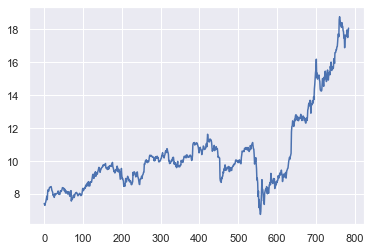

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

df_info["Adj Close"].plot(grid = True)

<AxesSubplot:>

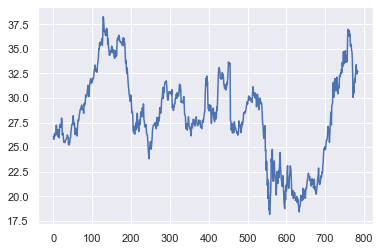

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

df_cts["Adj Close"].plot(grid = True)

In [11]:
s="INFY"
infosys, cts = (pdr.get_data_yahoo(s, start="2018-01-01").reset_index() for s in ["INFY", "CTS"])
 
stocks = pd.DataFrame({"INFY": df_info["Adj Close"],
                      "CTS": df_cts["Adj Close"]})
 
stocks.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,INFY,CTS
0,7.429263,26.042004
1,7.365414,25.796324
2,7.319807,26.287683
3,7.456626,26.385950
4,7.515914,26.238546


<AxesSubplot:>

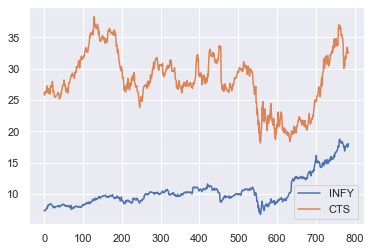

In [12]:
stocks.plot(grid = True)